In [1]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
A


array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [2]:
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

0.9999999999999997 -0.949999999999999


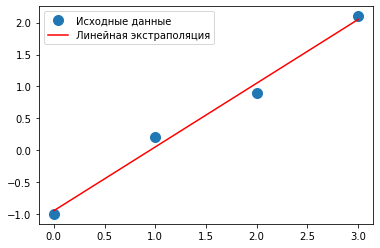

In [3]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x+c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

[-5.08923959 -4.06023002 -2.6153872  -2.2748731  -1.12295265 -0.18514769
  1.41367061  2.06206066  2.5081085   4.07470886  4.69448828]
[25.18664669 16.19642902  8.76648816  4.2031767   1.21683973 -0.07378599
  1.23754316  4.49584514  9.09255614 15.58926982 25.23760276]


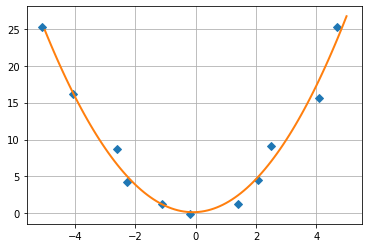

In [4]:
from numpy import *
from numpy.random import *

delta = 1.0
x = linspace(-5, 5, 11)
y = x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

m = vstack((x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-5, 5, 101)
plt.plot(x, y, 'D')

plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')

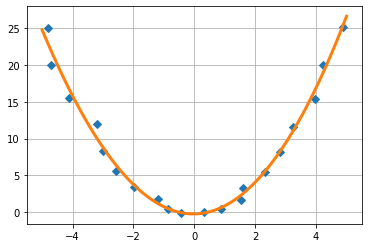

In [5]:
delta = 0.5
x = linspace(-5, 5, 20)
y = x**2+delta*(rand(20)-0.5)
x += delta*(rand(20)-0.5)

m = vstack((x**3, x**2, x, ones(20))).T

s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-5, 5, 101)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3], '-', lw = 3)
plt.grid()
plt.savefig('полином 3-1 степени.png')

In [6]:
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05*np.random.randn(len(xdata))

In [7]:
from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
beta_opt

array([0.25933182, 0.72912692, 0.47905172])

In [8]:
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

0.0002268953583847255
0.11594023317996771


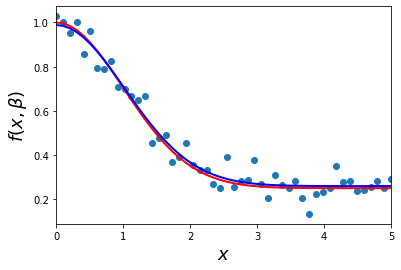

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[1.0282918  1.00356399 0.9511592  1.00383989 0.85813322 0.96071341
 0.79553717 0.78924017 0.82770233 0.71019882 0.69921022 0.6675007
 0.65058825 0.66703877 0.45302831 0.47923218 0.48854782 0.36958243
 0.39004239 0.45470773 0.35470181 0.3317179  0.33413293 0.26783743
 0.25044267 0.39183431 0.25435682 0.28105371 0.28476278 0.3759027
 0.27025477 0.20644201 0.30928758 0.26249183 0.25218275 0.28330819
 0.20591433 0.13340521 0.22424672 0.2342

In [9]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()
print(xdata)
print(ydata)

[0.26767324 0.74416886]
9.147889702370028e-05
0.08043833876262294


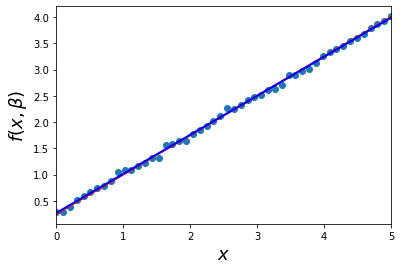

In [10]:
#Решение 1
#Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)

ydata = y+0.05*np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[0.22898918 0.76749    0.49597859]
0.00019278693966215908
0.16076412513808963


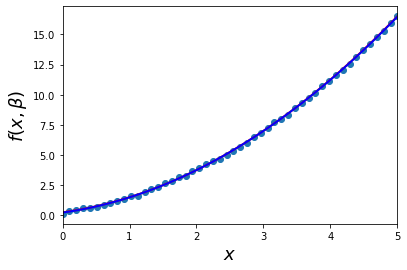

In [11]:
#Решение 2
#Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)

ydata = y+0.05*np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[1.02536949 1.980031  ]
3.781291758593185e-05
0.0874401598756115


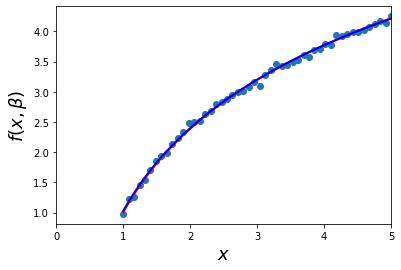

In [12]:
#Решение 3
#Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)

xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)

ydata = y+0.05*np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[1.00331177 1.99693583]
4.474511436767665e-06
0.10506513312976294


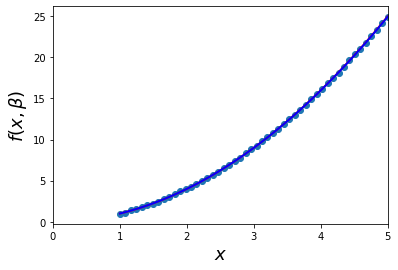

In [13]:
#Решение 4
#Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 * x**b1

xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)

ydata = y+0.05*np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

my_dict = {'Учебное время': [0.5,0.75,1,1.25,1.5,1.75,1.75,2,2.25,2.5,2.75,3,3.25,3.50,4,4.25,4.50,4.75,5,5.5],
          'Оценка': [10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}

dataset = pd.DataFrame(my_dict)
dataset.head()

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [15]:
print(dataset.shape)
dataset.describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.787500,53.700000
std,1.507165,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


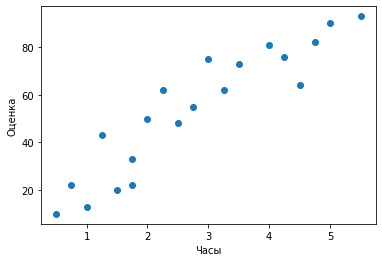

In [16]:
fig, ax = plt.subplots()
ax.scatter(dataset['Учебное время'], dataset['Оценка'])
ax.set_xlabel('Часы')
ax.set_ylabel('Оценка')
plt.show()

In [17]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]
5.475400029908791
[17.02706744]


In [18]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,90,90.610737
1,22,18.245701
2,93,99.124271
3,62,43.786302


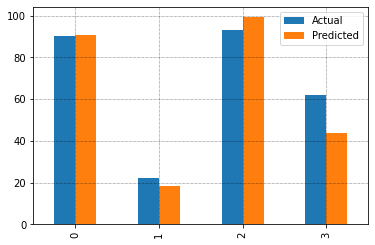

In [19]:
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='major', linestyle=':', linewidth='0.5', color='black')
plt.show()

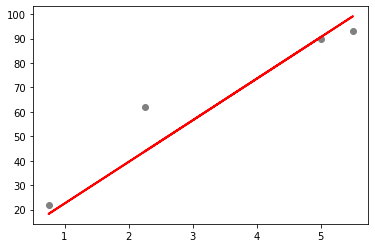

In [20]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [21]:
# Задание: Постройте модель линейной регрессии для произвольных данных.
df = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


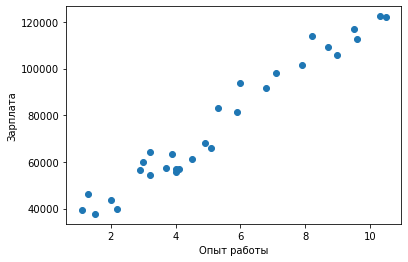

In [22]:
fig, ax = plt.subplots()
ax.scatter(df['YearsExperience'], df['Salary'])
ax.set_xlabel('Опыт работы')
ax.set_ylabel('Зарплата')
plt.show()

In [23]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
26780.099150628186
[9312.57512673]


In [24]:
y_pred = regressor.predict(X_test)
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


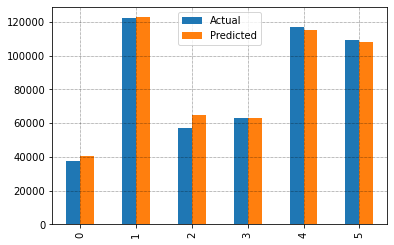

In [25]:
df2.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='major', linestyle=':', linewidth='0.5', color='black')
plt.show()

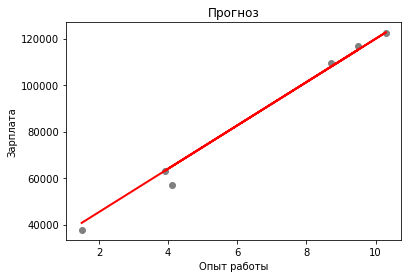

In [26]:
fig, ax = plt.subplots()
ax.scatter(X_test, y_test, color='gray')
ax.plot(X_test, y_pred, color='red', linewidth=2)
ax.set_title('Прогноз')
ax.set_xlabel('Опыт работы')
ax.set_ylabel('Зарплата')
plt.show()

In [27]:
import numpy as np

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
X = np.transpose(X)
X = np.c_[X, np.ones(X.shape[0])]
linreg = np.linalg.lstsq(X, y, rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

new_y = np.array(y)
# new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np.array(X)
# new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns = {0: 'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3'}, inplace=False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner")
dataset.head()

,y,x1,x2,x3,3
0,1,0.0,4.0,4.0,1.0
1,2,2.0,1.0,1.0,1.0
2,3,4.0,2.0,2.0,1.0
3,4,1.0,3.0,5.0,1.0
4,3,5.0,4.0,6.0,1.0


In [29]:
print(dataset.shape)
dataset.describe()

(23, 5)


,y,x1,x2,x3,3
count,23.000000,23.000000,23.000000,23.000000,23.0
mean,3.565217,5.347826,5.521739,5.043478,1.0
std,1.674029,2.404706,2.428422,2.704849,0.0
min,0.000000,0.000000,1.000000,1.000000,1.0
25%,3.000000,4.500000,4.000000,3.000000,1.0
50%,4.000000,5.000000,6.000000,5.000000,1.0
75%,5.000000,6.500000,7.500000,7.000000,1.0
max,6.000000,9.000000,9.000000,9.000000,1.0


In [30]:
X = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 43)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
x1,0.151756
x2,0.260242
x3,-0.043643


In [31]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
6,5,3.472604
10,4,3.472978
5,4,3.104249
13,5,4.622928
22,1,3.516247


In [32]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 1.9773486725117664


In [33]:
#Задание: определить качество вина на показателям, использую линейную регрессию
df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')
df.head()

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 43)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
fixed acidity,0.024553
volatile acidity,-1.209422
citric acid,-0.298112
residual sugar,0.007313
chlorides,-1.392776
free sulfur dioxide,0.004881
total sulfur dioxide,-0.003356
density,-12.833175
pH,-0.343850
sulphates,0.874278


In [34]:
y_pred = regressor.predict(X_test)
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred

,Actual,Predicted
547,6,6.200317
1197,6,5.472909
500,6,5.190908
631,5,5.630717
1128,5,5.593135
...,...,...
640,5,5.269605
447,5,6.009075
1577,6,5.788222
1167,7,6.677793


1.142857142857142 4.428571428571426


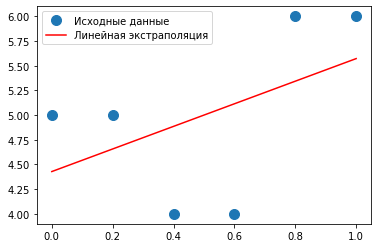

In [35]:
#Задание: Построить полиномы первой и второй степени. 2 Вариант
import numpy as np
x = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
y = np.array([5.0, 5.0, 4.0, 4.0, 6.0, 6.0])

A = np.vstack([x, np.ones(len(x))]).T
A

m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x+c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

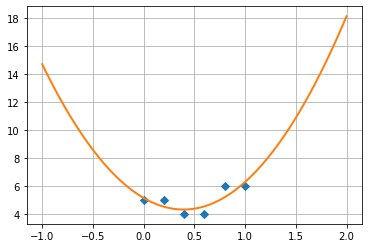

In [36]:
from numpy import *
from numpy.random import *

m = vstack((x**2, x, ones(6))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-1, 2, 101)
plt.plot(x, y, 'D')

plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')